In [688]:
listings = pd.read_csv('listings2.csv')
calendar = pd.read_csv('calendar.csv')

In [689]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [690]:
listings.head()

,listing_id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_acceptance_rate,...,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,17%,...,63,338,48,0,0,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,69%,...,18,194,409,32,0,f,1,1,0,0
2,5121,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",100%,...,90,365,50,0,0,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,7378,Rebecca,2009-02-03,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",25%,...,12,123,2,1,0,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",8967,Shunichi,2009-03-03,"New York, New York, United States",I used to work for a financial industry but no...,100%,...,34,192,507,33,2,f,1,0,1,0


In [694]:
listings.columns

Index(['listing_id', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'instant_bookable', 'ca

In [696]:
listings.shape 

(38277, 50)

In [697]:
listings.isnull().sum()

listing_id                                          0
name                                               13
description                                      1192
neighborhood_overview                           15627
host_id                                             0
host_name                                          34
host_since                                         34
host_location                                     137
host_about                                      16149
host_acceptance_rate                            16486
host_is_superhost                                  34
host_neighbourhood                               7464
host_listings_count                                34
host_total_listings_count                          34
host_verifications                                  0
host_has_profile_pic                               34
host_identity_verified                             34
neighbourhood_cleansed                              0
neighbourhood_group_cleansed

In [698]:
listings2 = listings.drop(['description','neighborhood_overview','host_name','host_about',\
               'host_acceptance_rate','host_is_superhost','host_verifications', 'host_has_profile_pic',\
                'host_identity_verified',\
               'number_of_reviews_ltm','number_of_reviews_l30d'], axis=1)


In [699]:
listings2.shape

(38277, 39)

In [700]:
listings2.head()

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",Midtown,8.0,8.0,Midtown,Manhattan,...,3,33,63,338,48,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,2008-12-07,"New York, New York, United States",Clinton Hill,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,3,6,18,194,409,f,1,1,0,0
2,5121,BlissArtsSpace!,7356,2009-02-03,"New York, New York, United States",Bedford-Stuyvesant,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,30,60,90,365,50,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,2009-02-03,"Brooklyn, New York, United States",Greenwood Heights,1.0,1.0,Sunset Park,Brooklyn,...,3,3,12,123,2,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,8967,2009-03-03,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Midtown,Manhattan,...,1,16,34,192,507,f,1,0,1,0


In [701]:
len(set(listings2['listing_id'])) 

# 38,277 unique airbnb listings for this dataset 

38277

In [702]:
listings2021 = listings2
listings2021.head()

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",Midtown,8.0,8.0,Midtown,Manhattan,...,3,33,63,338,48,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,2008-12-07,"New York, New York, United States",Clinton Hill,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,3,6,18,194,409,f,1,1,0,0
2,5121,BlissArtsSpace!,7356,2009-02-03,"New York, New York, United States",Bedford-Stuyvesant,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,30,60,90,365,50,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,2009-02-03,"Brooklyn, New York, United States",Greenwood Heights,1.0,1.0,Sunset Park,Brooklyn,...,3,3,12,123,2,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,8967,2009-03-03,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Midtown,Manhattan,...,1,16,34,192,507,f,1,0,1,0


In [735]:
listings2019 = pd.read_csv('NYC_2019.csv')
listings2017 = pd.read_csv('NYC_2017-10.csv')
listings2016 = pd.read_csv('NYC_2016-01.csv')
listings2015 = pd.read_csv('NYC_2015-08.csv')
listings2014 = pd.read_csv('NYC_2014-08.csv')

In [736]:
listings2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [737]:
listings2019.shape

(48895, 16)

In [738]:
listings2017.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,...,maximum_nights,calendar_updated,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month
0,18461891,NaN,NaN,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,...,6,5 months ago,0,0,NaN,f,f,strict,f,NaN
1,20702398,within an hour,100%,f,t,City Island,40.849191,-73.786509,f,House,...,21,2 weeks ago,19,2,100.0,f,f,moderate,f,2.00
2,6627449,within an hour,100%,f,t,City Island,40.849775,-73.786609,t,Apartment,...,21,2 weeks ago,28,21,95.0,f,f,strict,f,0.77
3,19949243,within a few hours,100%,f,t,City Island,40.848838,-73.782276,f,Boat,...,1125,6 days ago,30,0,NaN,t,f,strict,f,NaN
4,1886820,NaN,NaN,f,t,City Island,40.841144,-73.783052,t,House,...,90,16 months ago,30,0,NaN,f,f,strict,f,NaN


In [739]:
listings2017.shape

(44317, 31)

In [748]:
listings2016.head()

,Unnamed: 0,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,105,500.0,Private room,Manhattan,Hell's Kitchen,39,5.0,NaN,1.0,1.0,549.0,1.0,40.762099,-73.996022,2016-01-22 01:32:16.039626
1,1,2515,2758.0,Private room,Manhattan,Harlem,125,4.5,2.0,1.0,2.0,59.0,2.0,40.799205,-73.953676,2016-01-21 16:14:58.025230
2,2,2539,2787.0,Private room,Brooklyn,Kensington,1,5.0,2.0,1.0,1.0,39.0,1.0,40.647486,-73.972370,2016-01-21 17:48:59.403956
3,3,2595,2845.0,Entire home/apt,Manhattan,Midtown,19,5.0,2.0,0.0,1.0,225.0,1.0,40.753621,-73.983774,2016-01-23 16:09:37.688387
4,4,3330,4177.0,Private room,Brooklyn,Williamsburg,19,5.0,2.0,1.0,1.0,90.0,3.0,40.708558,-73.942362,2016-01-22 20:20:20.978411


In [741]:
listings2016.shape[0]

36003

In [742]:
listings2015.head()

,Unnamed: 0,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,105,500,Private room,Manhattan,Hell's Kitchen,39,5.0,NaN,1.0,1.0,549.0,1.0,40.762099,-73.996022,2015-08-10 21:44:27.340600
1,1,2515,2758,Private room,Manhattan,Harlem,117,4.5,2.0,1.0,2.0,59.0,2.0,40.799205,-73.953676,2015-08-10 21:44:27.340600
2,2,2595,2845,Entire home/apt,Manhattan,Midtown,17,5.0,2.0,0.0,1.0,285.0,1.0,40.753621,-73.983774,2015-08-10 21:44:27.340600
3,3,3330,4177,Private room,Brooklyn,Williamsburg,16,4.5,2.0,1.0,1.0,125.0,3.0,40.708558,-73.942362,2015-08-10 21:44:27.340600
4,4,3831,4869,Private room,Brooklyn,Clinton Hill,8,4.5,3.0,1.0,1.0,80.0,1.0,40.685138,-73.959757,2015-08-10 21:44:27.340600


In [743]:
listings2014.head()

,Unnamed: 0,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,105,500,Private room,Manhattan,Hell's Kitchen,39,5.0,7,1.0,1.0,167.0,1,40.762099,-73.996022,2014-08-31 22:55:08.354
1,1,2515,2758,Private room,Manhattan,Harlem,102,4.5,2,1.0,2.0,66.0,2,40.799205,-73.953676,2014-09-01 02:40:26.770
2,2,2684,2965,Private room,Manhattan,Upper West Side,0,NaN,2,1.0,1.5,134.0,1,40.792353,-73.967807,2014-08-31 23:37:21.967
3,3,2993,3352,Entire home/apt,Manhattan,Lower East Side,2,4.5,2,1.0,1.0,168.0,5,40.723593,-73.991188,2014-09-01 18:06:43.285
4,4,3330,4177,Private room,Brooklyn,Williamsburg,9,5.0,2,1.0,1.0,140.0,3,40.708558,-73.942362,2014-08-31 14:16:24.363


In [744]:
listings2015.columns = listings2015.columns.str.replace('Unnamed: 0', 'listing_id')

In [746]:
listings2014.columns = listings2014.columns.str.replace('Unnamed: 0', 'listing_id')

In [749]:
listings2016.columns = listings2016.columns.str.replace('Unnamed: 0', 'listing_id')

In [751]:
listings2017.columns = listings2017.columns.str.replace('id', 'listing_id')
listings2019.columns = listings2019.columns.str.replace('id', 'listing_id')

In [754]:
print(len(set(listings2014['listing_id'])))
print(len(set(listings2015['listing_id'])))
print(len(set(listings2016['listing_id'])))
print(len(set(listings2017['listing_id'])))
print(len(set(listings2019['listing_id'])))
print(len(set(listings2021['listing_id'])))


20777
30001
36003
44317
48895
38277


In [755]:
tot_2014 = listings2014.shape[0]
tot_2015 = listings2015.shape[0]
tot_2016 = listings2016.shape[0]
tot_2017 = listings2017.shape[0]
tot_2019 = listings2019.shape[0]
tot_2021 = listings2021.shape[0]

print(tot_2014)
print(tot_2015)
print(tot_2016)
print(tot_2017)
print(tot_2019)
print(tot_2021)

# unique values in each dataset 

20777
30001
36003
44317
48895
38277


In [756]:
tot_listings = [1092, 2362, 5628, 10391,tot_2014,tot_2015,tot_2016,tot_2017,52000, tot_2019,36923,tot_2021]
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

def list_todict(list1, list2):
    dict = {}
    dict['year'] = list1
    dict['tot_listings'] = list2
    return dict 
 
listings_over_time = pd.DataFrame(list_todict(year, tot_listings))
listings_over_time.columns = ['Year', 'Active Listings']
listings_over_time 

# source: https://comptroller.nyc.gov/reports/the-impact-of-airbnb-on-nyc-rents/

,Year,Active Listings
0,2010,1092
1,2011,2362
2,2012,5628
3,2013,10391
4,2014,20777
5,2015,30001
6,2016,36003
7,2017,44317
8,2018,52000
9,2019,48895


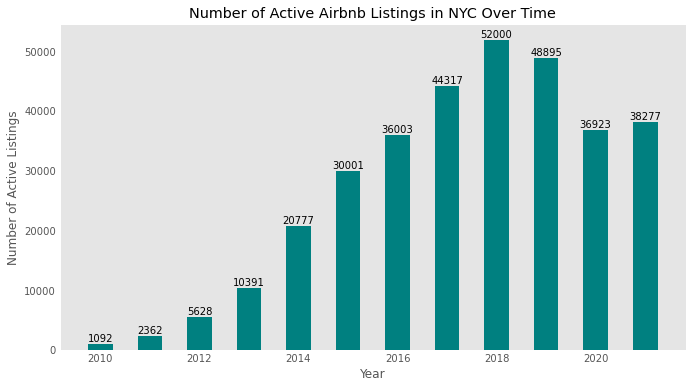

In [757]:
fig, ax = plt.subplots(figsize=(10,6))
num_listings = listings_over_time['Active Listings']
year = listings_over_time['Year']
plt.bar(year, num_listings, color = 'teal', width=0.5)
plt.xlabel("Year")
plt.ylabel("Number of Active Listings")
ax.set_title('Number of Active Airbnb Listings in NYC Over Time')
plt.grid(False)
plt.bar_label(ax.containers[0])

plt.show()

In [890]:
listings2021.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood', 'area', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [891]:
listings2021

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,area,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",Midtown,8.0,8.0,Midtown,Manhattan,...,3,33,63,338,48,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,2008-12-07,"New York, New York, United States",Clinton Hill,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,3,6,18,194,409,f,1,1,0,0
2,5121,BlissArtsSpace!,7356,2009-02-03,"New York, New York, United States",Bedford-Stuyvesant,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,30,60,90,365,50,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,2009-02-03,"Brooklyn, New York, United States",Greenwood Heights,1.0,1.0,Sunset Park,Brooklyn,...,3,3,12,123,2,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,8967,2009-03-03,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Midtown,Manhattan,...,1,16,34,192,507,f,1,0,1,0
5,5203,Cozy Clean Guest Room - Family Apt,7490,2009-02-05,"New York, New York, United States",Upper West Side,1.0,1.0,Upper West Side,Manhattan,...,0,0,0,0,118,f,1,0,1,0
6,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,2009-03-10,"New York, New York, United States",Park Slope,3.0,3.0,South Slope,Brooklyn,...,2,17,47,322,204,f,3,1,2,0
7,6848,Only 2 stops to Manhattan studio,15991,2009-05-06,"New York, New York, United States",Williamsburg,1.0,1.0,Williamsburg,Brooklyn,...,2,30,30,179,181,t,1,1,0,0
8,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,2009-05-07,"New York, New York, United States",East Harlem,0.0,0.0,East Harlem,Manhattan,...,30,60,90,365,0,f,2,0,2,0
9,6990,UES Beautiful Blue Room,16800,2009-05-12,"New York, New York, United States",East Harlem,3.0,3.0,East Harlem,Manhattan,...,1,4,34,309,234,t,1,0,1,0


In [760]:
listings2021 = listings2021.rename(columns = {"neighbourhood_group_cleansed": "area", \
                                               "neighbourhood_cleansed":"neighbourhood"})
listings2021.head()

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,area,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",Midtown,8.0,8.0,Midtown,Manhattan,...,3,33,63,338,48,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,2008-12-07,"New York, New York, United States",Clinton Hill,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,3,6,18,194,409,f,1,1,0,0
2,5121,BlissArtsSpace!,7356,2009-02-03,"New York, New York, United States",Bedford-Stuyvesant,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,30,60,90,365,50,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,2009-02-03,"Brooklyn, New York, United States",Greenwood Heights,1.0,1.0,Sunset Park,Brooklyn,...,3,3,12,123,2,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,8967,2009-03-03,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Midtown,Manhattan,...,1,16,34,192,507,f,1,0,1,0


In [761]:
# listings broken down by borough 
areas = listings2021.groupby('area')[['listing_id']].count()
areas

,listing_id
area,
Bronx,1104
Brooklyn,14716
Manhattan,16781
Queens,5323
Staten Island,353


In [762]:
areas['sum'] = 38277
areas['proportion'] = round((areas['listing_id']/areas['sum'])*100,2)
areas

areas_perc = areas[['listing_id','proportion']]
areas_perc

,listing_id,proportion
area,,
Bronx,1104,2.88
Brooklyn,14716,38.45
Manhattan,16781,43.84
Queens,5323,13.91
Staten Island,353,0.92


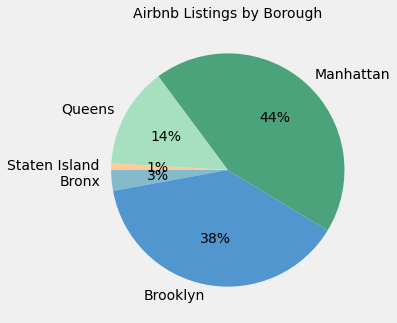

In [766]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
plt.title("Airbnb Listings by Borough", fontsize = 14)
labels = 'Bronx','Brooklyn','Manhattan','Queens','Staten Island'
colors = ['#85bacc','#5196cf','#4ba37c','#a6e0c1','#ffcc99','#ffffbf']
g = plt.pie(areas.proportion, labels=labels, colors=colors, autopct='%1.0f%%', startangle=180)
plt.show()

In [894]:
# listings broken down by neighbourhood
neighbourhood_grp = listings2021.groupby('neighbourhood')[['listing_id']].count()
neighbourhood_grp

,listing_id
neighbourhood,
Allerton,33
Arden Heights,4
Arrochar,18
Arverne,89
Astoria,669
Bath Beach,18
Battery Park City,78
Bay Ridge,118
Bay Terrace,3


In [953]:
nbhd = neighbourhood_grp.sort_values('listing_id', ascending=False)
top_25_nbhd = nbhd.iloc[1:26,:]
top_25_stats = top_25_nbhd.agg(['mean','std','max','min','sum'])
top_25_stats

,listing_id
mean,948.320000
std,612.141168
max,2603.000000
min,381.000000
sum,23708.000000


In [955]:
top_25_nbhd = top_25_nbhd.rename(columns={"listing_id":"count"})
top_25_nbhd = top_25_nbhd.sort_values('count', ascending=True)
top_25_nbhd

,count
neighbourhood,
Clinton Hill,381
Flushing,385
Woodside,394
Kips Bay,415
Prospect-Lefferts Gardens,422
Long Island City,424
East Flatbush,448
Flatbush,455
Financial District,470


In [957]:
top_25_nbhd = top_25_nbhd.reset_index()

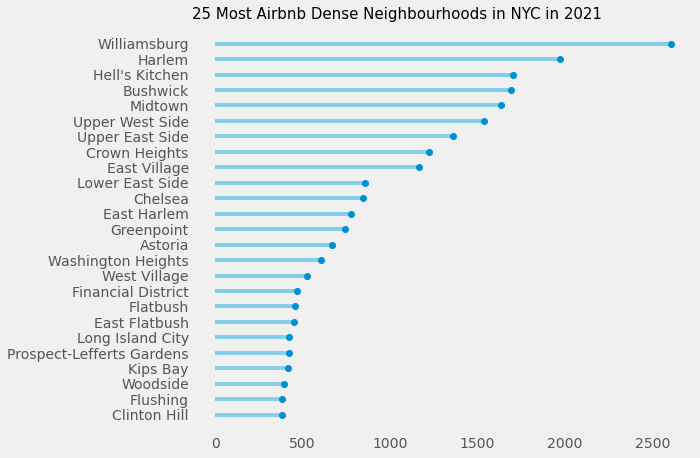

In [958]:
top_25_nbhd2 = top_25_nbhd['neighbourhood']
count_25nbhd = top_25_nbhd['count']
plt.figure(figsize=(8,7))
plt.title("25 Most Airbnb Dense Neighbourhoods in NYC in 2021", fontsize = 15, loc='left')
plt.grid(False)
plt.hlines(y=top_25_nbhd2, xmin = 0, xmax = count_25nbhd, color='skyblue')
plt.plot(count_25nbhd, top_25_nbhd2, "o")
plt.show()

In [ ]:
count_25nbhd = top_25_nbhd['count']
plt.figure(figsize=(8,7))
plt.title("25 Most Airbnb Dense Neighbourhoods in NYC in 2021", fontsize = 15, loc='left')
plt.grid(False)
plt.hlines(y=neighbourhood, xmin = 0, xmax = count_25nbhd, color='skyblue')
plt.plot(count_25nbhd, top_25_nbhd2, "o")
plt.show()

In [833]:
top_10_nbhd = nbhd.iloc[1:11,:]
top_10_nbhd

,listing_id
neighbourhood,
Williamsburg,2603
Harlem,1971
Hell's Kitchen,1702
Bushwick,1693
Midtown,1635
Upper West Side,1538
Upper East Side,1362
Crown Heights,1225
East Village,1167


In [964]:
# an overwhelming majority (96%) of all active airbnb listings in 2021 were in Manhattan, 
# Brooklyn, and Queens, so these boroughs will be the focus of the analysis 
listings2021.groupby(['room_type'])[['listing_id']].count()

,listing_id
room_type,
Entire home/apt,20397
Hotel room,210
Private room,17098
Shared room,572


In [967]:
# remove hotel room as room_type 
room_types = listings2021[listings2021.room_type != 'Hotel room']
room_types.groupby(['room_type'])[['listing_id']].count()

# entire home/apartment listings make up the majority of all airbnb listings in nyc 

,listing_id
room_type,
Entire home/apt,20397
Private room,17098
Shared room,572


In [1060]:
room_types.groupby(['area','room_type'])[['listing_id']].count()

listing_id
area          room_type                  
Bronx         Entire home/apt         440
              Private room            634
              Shared room              29
Brooklyn      Entire home/apt        7529
              Private room           6989
              Shared room             189
Manhattan     Entire home/apt       10188
              Private room           6158
              Shared room             244
Queens        Entire home/apt        2056
              Private room           3149
              Shared room             109
Staten Island Entire home/apt         184
              Private room            168
              Shared room               1

In [1206]:
manhattan_area = room_types[room_types.area == 'Manhattan']
manhattan_area

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,area,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",Midtown,8.0,8.0,Midtown,Manhattan,...,3,33,63,338,48,f,3,3,0,0
4,5178,Large Furnished Room Near B'way,8967,2009-03-03,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Midtown,Manhattan,...,1,16,34,192,507,f,1,0,1,0
5,5203,Cozy Clean Guest Room - Family Apt,7490,2009-02-05,"New York, New York, United States",Upper West Side,1.0,1.0,Upper West Side,Manhattan,...,0,0,0,0,118,f,1,0,1,0
8,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,2009-05-07,"New York, New York, United States",East Harlem,0.0,0.0,East Harlem,Manhattan,...,30,60,90,365,0,f,2,0,2,0
9,6990,UES Beautiful Blue Room,16800,2009-05-12,"New York, New York, United States",East Harlem,3.0,3.0,East Harlem,Manhattan,...,1,4,34,309,234,t,1,0,1,0
12,7750,2 Furnished bedrooms next to Central Park,17985,2009-05-20,"Brooklyn, New York, United States",East Harlem,2.0,2.0,East Harlem,Manhattan,...,28,58,88,178,0,f,2,0,2,0
15,9357,Midtown Pied-a-terre,30193,2009-08-06,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Hell's Kitchen,Manhattan,...,0,0,0,0,58,f,1,1,0,0
16,9657,Modern 1 BR / NYC / East Village,21904,2009-06-16,"New York, New York, United States",East Village,1.0,1.0,East Village,Manhattan,...,5,35,65,65,43,f,1,1,0,0
17,9704,Spacious 1 bedroom in luxe building,32045,2009-08-16,"New York, New York, United States",Harlem,1.0,1.0,Harlem,Manhattan,...,3,33,63,338,98,f,1,0,1,0
21,12192,ENJOY Downtown NYC!,46978,2009-10-19,"New York, New York, United States",Alphabet City,2.0,2.0,East Village,Manhattan,...,0,0,0,0,267,f,2,0,2,0


In [1207]:
manhattan_area['price'] = manhattan_area['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)

/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_4614/1450228349.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  manhattan_area['price'] = manhattan_area['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)
/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_4614/1450228349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_area['price'] = manhattan_area['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)


In [1208]:
type(manhattan_area['price'][0])

numpy.float64

In [1209]:
manhattan_area[['room_type','price','listing_id']].sort_values('price', ascending=False)

,room_type,price,listing_id
23199,Private room,10000.0,38993679
23198,Private room,10000.0,38993616
15097,Entire home/apt,10000.0,22436899
19395,Shared room,10000.0,31219800
23619,Private room,10000.0,39574087
23269,Private room,10000.0,39100961
23196,Private room,10000.0,38993493
23197,Private room,10000.0,38993556
3697,Entire home/apt,9999.0,4737930
26115,Entire home/apt,9999.0,43021419


In [1210]:
manhattan_area[(manhattan_area.price > 1000)][['room_type','price']].count()

room_type    253
price        253
dtype: int64

In [1211]:
manhattan_area[(manhattan_area.price < 20)][['room_type','price']].count()

room_type    8
price        8
dtype: int64

In [1212]:
# There are only 253 listings with prices > 1000 per night, which skews the price data significantly 
# Upon closer inspection, they appeared to be expensive hotel listings, loft listings or penthouses designed for parties
ma2 = manhattan_area[(manhattan_area.price <= 1000) & (manhattan_area.price > 20)][['listing_id','room_type','price']].sort_values('price',ascending=False)
ma2.groupby(['room_type'])[['listing_id']].count()

,listing_id
room_type,
Entire home/apt,10012
Private room,6077
Shared room,240


In [1213]:
pd.cut(ma2['price'],bins=40)
pd.cut(ma2['price'],bins=40).value_counts()

(94.425, 118.9]      2097
(69.95, 94.425]      1960
(118.9, 143.375]     1793
(143.375, 167.85]    1643
(45.475, 69.95]      1480
(167.85, 192.325]    1241
(192.325, 216.8]     1085
(216.8, 241.275]      656
(241.275, 265.75]     649
(290.225, 314.7]      592
(20.021, 45.475]      522
(265.75, 290.225]     474
(339.175, 363.65]     308
(388.125, 412.6]      274
(314.7, 339.175]      270
(363.65, 388.125]     153
(583.925, 608.4]      137
(486.025, 510.5]      135
(437.075, 461.55]     127
(412.6, 437.075]       99
(461.55, 486.025]      74
(534.975, 559.45]      71
(975.525, 1000.0]      66
(632.875, 657.35]      54
(779.725, 804.2]       49
(510.5, 534.975]       44
(681.825, 706.3]       37
(559.45, 583.925]      36
(730.775, 755.25]      33
(877.625, 902.1]       31
(657.35, 681.825]      29
(755.25, 779.725]      18
(608.4, 632.875]       16
(828.675, 853.15]      15
(926.575, 951.05]      15
(804.2, 828.675]       14
(706.3, 730.775]       13
(853.15, 877.625]       8
(902.1, 926.

(array([ 522., 1480., 1960., 2097., 1793., 1643., 1241., 1085.,  656.,
         649.,  474.,  592.,  270.,  308.,  153.,  274.,   99.,  127.,
          74.,  135.,   44.,   71.,   36.,  137.,   16.,   54.,   29.,
          37.,   13.,   33.,   18.,   49.,   14.,   15.,    8.,   31.,
           6.,   15.,    5.,   66.]),
 array([  21.   ,   45.475,   69.95 ,   94.425,  118.9  ,  143.375,
         167.85 ,  192.325,  216.8  ,  241.275,  265.75 ,  290.225,
         314.7  ,  339.175,  363.65 ,  388.125,  412.6  ,  437.075,
         461.55 ,  486.025,  510.5  ,  534.975,  559.45 ,  583.925,
         608.4  ,  632.875,  657.35 ,  681.825,  706.3  ,  730.775,
         755.25 ,  779.725,  804.2  ,  828.675,  853.15 ,  877.625,
         902.1  ,  926.575,  951.05 ,  975.525, 1000.   ]),
 <BarContainer object of 40 artists>)

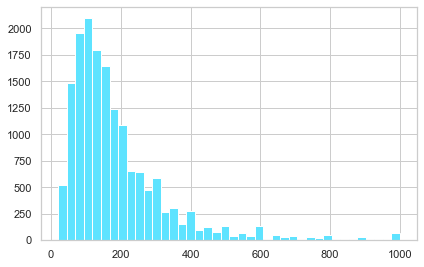

In [1237]:
plt.hist(ma2['price'], bins=40, color = "#5ee3ff")

In [1215]:
#fig, ax = plt.subplots(figsize=(10,10))
#sns.set_theme(style="whitegrid")
#ax = sns.barplot(x=ma2["price"])
#ax = sns.barplot(x="price", y="listing_id", data=ma2)

#plt.show()



In [1216]:
ma2.groupby(['room_type'])['price'].count()

room_type
Entire home/apt    10012
Private room        6077
Shared room          240
Name: price, dtype: int64

room_type
Entire home/apt    AxesSubplot(0.08,0.07;0.87x0.81)
Private room       AxesSubplot(0.08,0.07;0.87x0.81)
Shared room        AxesSubplot(0.08,0.07;0.87x0.81)
Name: price, dtype: object

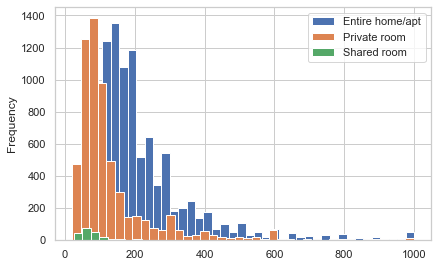

In [1217]:
ma2.groupby(['room_type'])['price'].plot(kind='hist',legend=True,bins=40)


In [1220]:
ma3 = ma2.groupby(['room_type','price'])[['listing_id']].count()
ma3 = ma3.rename(columns={"listing_id":"listing_id_count"})


In [1225]:
ma3 = ma3.reset_index()

In [1233]:
ma3

,room_type,price,listing_id_count
0,Entire home/apt,35.0,1
1,Entire home/apt,39.0,4
2,Entire home/apt,40.0,2
3,Entire home/apt,44.0,1
4,Entire home/apt,45.0,2
5,Entire home/apt,46.0,1
6,Entire home/apt,48.0,3
7,Entire home/apt,49.0,3
8,Entire home/apt,50.0,17
9,Entire home/apt,52.0,3


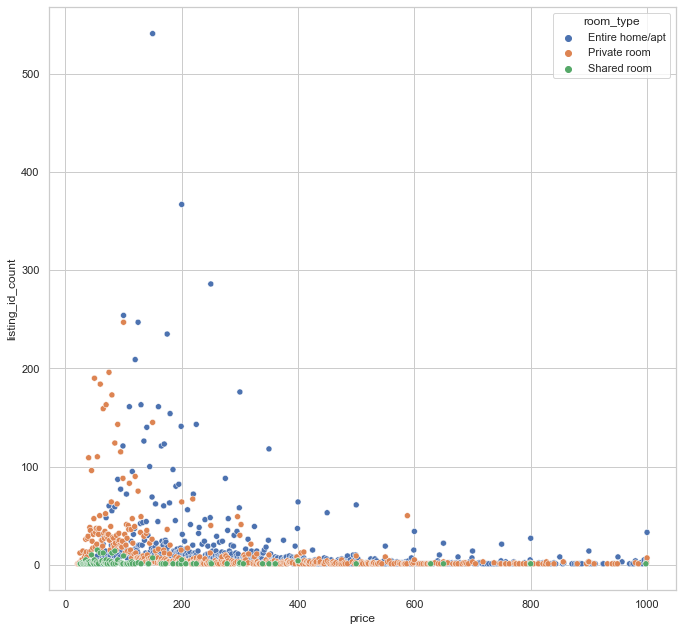

In [1236]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=ma3["price"], y=ma3["listing_id_count"], hue=ma3["room_type"])
plt.show()